# KNN Regressor

## Load required packages

In [1]:
library(reshape2)
library(ggplot2)
library(corrplot)

corrplot 0.84 loaded


## Loading required data

In [2]:
# load data from csv files
train1 = read.csv("Task1A_train.csv",header=TRUE)
test1 = read.csv("Task1A_test.csv",header=TRUE)

#creating datapoints and labels
train.data <- train1[, -ncol(train1)] 
train.label <- as.vector(train1[, ncol(train1)])
test.data <- test1[, -ncol(test1)] 
test.label <- as.vector(test1[, ncol(test1)])

# Further processing the data
train.data <- data.frame(matrix(unlist(train.data), nrow=length(train.data), byrow=T))
test.data <- data.frame(matrix(unlist(test.data), nrow=length(test.data), byrow=T))

names(train.data)[1]<-paste("x")
names(test.data)[1]<-paste("x")

### Auxillary function for find the average of points

In [3]:
# function to find average
avg <- function(x) {
    round(mean(x),digits=7)
}

## KNN regression algorithm

In [4]:
# KNN function (distance should be one of euclidean, maximum, manhattan, canberra, binary or minkowski)
knn <- function(train.data, train.label, test.data, K=3, distance = 'euclidean'){
    ## count number of train samples
    train.len <- nrow(train.data)
    
    ## count number of test samples
    test.len <- nrow(test.data)
    
    ## calculate distances between samples
    dist <- as.matrix(dist(rbind(test.data, train.data), method= distance))[1:test.len, (test.len+1):(test.len+train.len)]
    
    ## for each test sample...
    for (i in 1:test.len){
        ### ...find its K nearest neighbours from training sampels...
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        ###... and calculate the predicted labels according to the mean value
        test.label[i]<- (avg(train.label[nn]))
    }
    
    ## return the class labels as output
    return (test.label)
}

## Finding the test error and train error 

In [7]:
# creating the dataframe that holds both train error and test error
miss <- data.frame('K'=1:20, 'train'=rep(0,20), 'test'=rep(0,20))
for (k in 1:20){
    miss[k,'train'] <- sum((knn(train.data, train.label, train.data, K=k) - train.label)^2)/nrow(train.data)
    miss[k,'test'] <-  sum((knn(train.data, train.label, test.data, K=k)  - test.label)^2)/nrow(test.data)
}

## Plotting the test error and train error in one graph

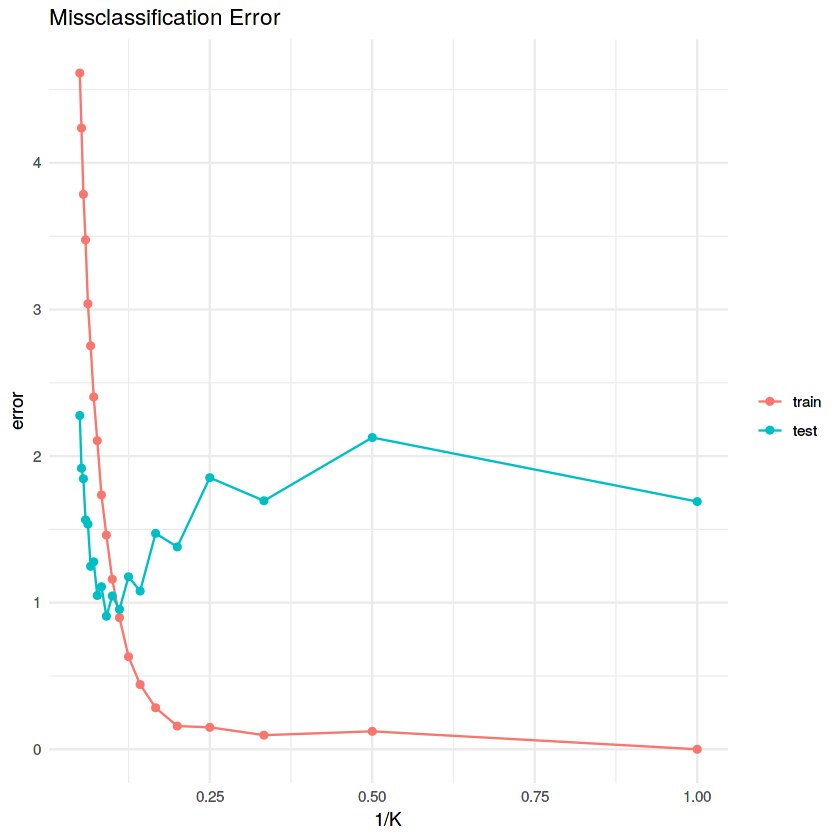

In [6]:
# dataframe melting for visualization
miss.m <- melt(miss, id='K') # reshape for visualization
names(miss.m) <- c('K', 'type', 'error')
# plotting using the ggplots
ggplot(data=miss.m, aes(x=1/K, y=error, color=type)) + geom_line() + geom_point()+
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("Missclassification Error")

## Observation for the plots

We can find the K value based the one statement **" A model that is underfit will have high training and high testing error while an overfit model will have extremely low training error but a high testing error."**. 

From the graph, at x value = .120 we can is a stable model. That means K = 10 is the perfect model.

if we choose K < 10, the models will be underfitted and if K > 10 models will be overfitted.